# Import, options

In [31]:
import numpy, seaborn, pandas
import matplotlib, matplotlib.pyplot as plt

In [32]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [33]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [34]:
#data DEseq HEK293 significant ones
df_GExp_all = pandas.read_csv(file_directory+'1) input/HEK293_temp_DESeq.csv',
                               sep = ',')
print(df_GExp_all.shape, '\n', df_GExp_all.columns)

# select columns and rename
columns = ['log2FoldChange','padj','gene']
df_GExp_all = df_GExp_all[columns]
df_GExp_all = df_GExp_all.rename(columns = {'log2FoldChange' : 'log2_FC (GEx)',
                                            'padj' : 'padj(GEx)',
                                            'gene' : 'SYMBOL'})

df_GExp_all.sort_values('padj(GEx)')

(14335, 14) 
 Index(['Row.names', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'gene', '37deg', '37deg.1', '37deg.2', '32deg', '32deg.1',
       '32deg.2'],
      dtype='object')


,log2_FC (GEx),padj(GEx),SYMBOL
0,1.851678,6.554549e-25,SRSF5
1,1.667631,1.024723e-12,FANCB
2,-1.511831,5.743420e-09,AC011043.1
3,1.089112,1.124862e-06,RBM3
4,1.128752,1.124862e-06,FAM110D
...,...,...,...
14331,0.000283,9.994810e-01,ACYP2
14329,0.000257,9.994810e-01,GBE1
14332,0.000240,9.994810e-01,GLRX
14333,0.000128,9.995072e-01,CIZ1


In [35]:
# keep padj < 0.05
df_GExp_signif = df_GExp_all[df_GExp_all['padj(GEx)'] < 0.05]
df_GExp_all.sort_values('padj(GEx)')
df_GExp_signif.shape

(145, 3)

In [36]:
#data hNPC all H3K36me3
df_H3K36me3 = pandas.read_csv(file_directory+'1) input/hNPC_H3K36me3_allPeaks_max20_MACS3.csv',
                               sep = ',')

# select columns
columns = ['SYMBOL','Fold','p.value','annotation']

print(df_H3K36me3.shape)
df_H3K36me3[columns].head(5)

(17794, 25)


,SYMBOL,Fold,p.value,annotation
0,CREBL2,-20.405148,1.764480e-20,Promoter (1-2kb)
1,PCCA,-19.528880,2.116609e-18,"Intron (ENST00000376279.7/5095, intron 19 of 22)"
2,ZNF83,-19.227747,1.512751e-16,"Intron (ENST00000702778.1/ENST00000702778.1, i..."
3,EMBP1,-18.824480,9.374397e-16,Distal Intergenic
4,NRP1,-18.894174,1.186074e-15,5' UTR


In [37]:
#data hNPC highest H3K36me3
df_H3K36me3_highest = pandas.read_csv(file_directory+'1) input/from_output/highest_NPC_H3K36me3_MACS3.csv',
                               sep = ',')
print(df_H3K36me3_highest.shape)

# select columns
columns = ['SYMBOL','Fold','p.value']
df_H3K36me3_highest = df_H3K36me3_highest[columns]
df_H3K36me3_highest = df_H3K36me3_highest.rename(columns = {'Fold' : 'FC (H3K36me3)',
                                                            'p.value' : 'pvalue(H3K36me3)'})
df_H3K36me3_highest.head()

(37, 4)


,SYMBOL,FC (H3K36me3),pvalue(H3K36me3)
0,CREBL2,-20.405148,1.764480e-20
1,PCCA,-19.528880,2.116609e-18
2,ZNF83,-19.227747,1.512751e-16
3,EMBP1,-18.824480,9.374397e-16
4,NRP1,-18.894174,1.186074e-15


# I] Do the genes that experience the most significant loss of H3K36me3 at 32°C overlap with the differentially expressed genes (DEGs) in HEK293 cells?

In [38]:
print(df_GExp_signif.shape, df_H3K36me3_highest.shape)

# see what are the commun genes
merged_df = pandas.merge(df_H3K36me3_highest, df_GExp_signif, on='SYMBOL', how='inner')

print(merged_df.shape)

(145, 3) (37, 3)
(0, 5)


#### The gene which loss the most H3K36me at 32°C are not in the DEG genes of HEK293.

# II] Are H3K36me3 and GExp FoldChanges worth studying together?

In [39]:
# create a df withh all the genes expressed in the GExp, and with altered H3K36me3 in hNPC
df_H3K36me3_and_GExp = pandas.merge(df_H3K36me3, df_GExp_all, on='SYMBOL', how='inner')
print(f'we lost {len(df_H3K36me3) - len(df_H3K36me3_and_GExp)} genes')
df_H3K36me3_and_GExp.shape

we lost 4483 genes


(13311, 27)

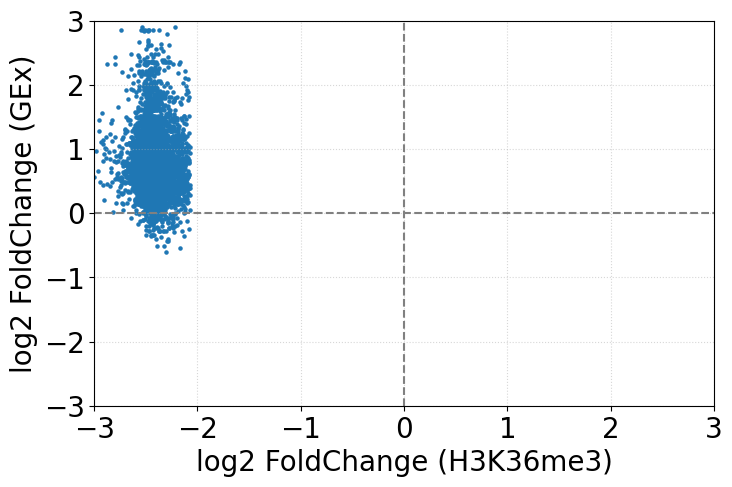

In [40]:
plt.scatter(x=df_H3K36me3_and_GExp['Fold'].apply(lambda x:-numpy.log2(x)),
            y=df_H3K36me3_and_GExp['log2_FC (GEx)'].apply(lambda x:-numpy.log10(x)),
            s=5)

plt.ylim(-3, 3)
plt.xlim(-3, 3)

plt.xlabel("log2 FoldChange (H3K36me3)")
plt.ylabel("log2 FoldChange (GEx)")

plt.axvline(0,color="grey",linestyle="--")
plt.axhline(0,color="grey",linestyle="--")

# II] What H3K36me3 differences of the differentially expressed genes in HEK293 cells at 32°C?

In [41]:
#volcano plot
df_H3K36me3_andDEG = df_H3K36me3[df_H3K36me3['SYMBOL'].isin(df_GExp_signif['SYMBOL'].values)]
df_H3K36me3_andDEG.reset_index(drop=True, inplace=True)
size_total = len(df_H3K36me3_andDEG)
number_gene = len(df_H3K36me3_andDEG.drop_duplicates(subset = "SYMBOL"))

print(size_total, number_gene)

158 71


####  71 genes are differentially expressed \n and have different H3K36me3 at 32°C. Several mutations per gene, so 158 points

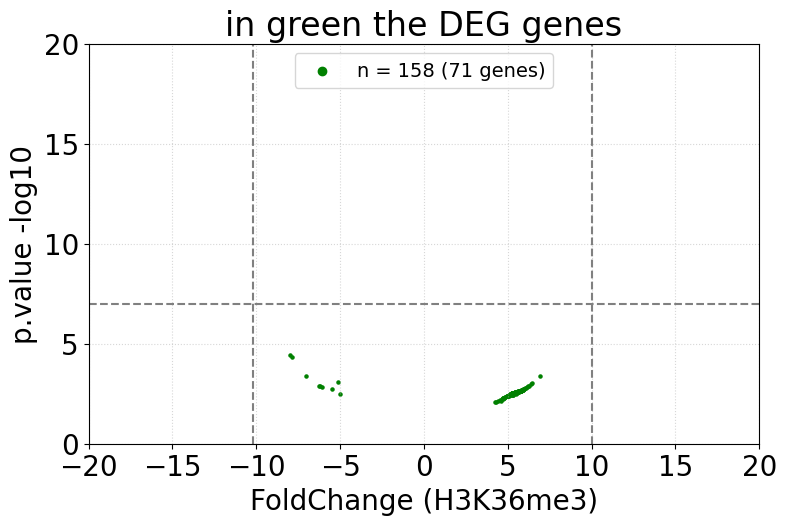

In [42]:
#volcano plot colors based on HEK293 GEx
plt.scatter(x=df_H3K36me3_andDEG['Fold'],
            y=df_H3K36me3_andDEG['p.value'].apply(lambda x:-numpy.log10(x)),
            s=5, c='green')

plt.scatter(x=[],y=[], marker="o", color='g', label= f'n = {size_total} ({number_gene} genes)')

plt.legend(fontsize='14')
plt.tight_layout()

plt.title("in green the DEG genes")
plt.ylim(0, 20)
plt.xlim(-20, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_hNPC_H3K36me3_and_HEK293_DEG_pos_negDEG'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [43]:
# to sort with colors the +DEG and -DEG
df_H3K36me3_andDEG_po_neg = pandas.merge(df_H3K36me3_andDEG, df_GExp_signif, on='SYMBOL', how='left')
print(len(df_H3K36me3_andDEG_po_neg))

# Chech up duplicate are ok (= H3K36me3 different but same GExp data)
df_H3K36me3_andDEG_po_neg[df_H3K36me3_andDEG_po_neg["SYMBOL"] =='CEP83']

158


,seqnames,start,end,width,strand,width.1,strand.1,Conc,Conc_32,Conc_37,...,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME,log2_FC (GEx),padj(GEx)
1,chr12,94377781,94378180,400,*,401,*,6.846523,0.000000,7.846523,...,22330,2,51134,ENST00000551250.1,22941,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.025614
11,chr12,94421505,94421904,400,*,401,*,5.557848,0.000000,6.557848,...,9535,2,51134,ENST00000551596.1,-8993,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.025614
58,chr12,94312048,94312447,400,*,401,*,5.202027,6.202027,0.000000,...,4352,2,51134,ENST00000546783.1,731,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.025614
83,chr12,94343082,94343481,400,*,401,*,4.984000,5.984000,0.000000,...,4163,2,51134,ENST00000546587.1,-7234,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.025614
113,chr12,94391280,94391679,400,*,401,*,4.923560,5.923560,0.000000,...,22330,2,51134,ENST00000551250.1,9442,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.025614
119,chr12,94423411,94423810,400,*,401,*,4.506970,5.506970,0.000000,...,9535,2,51134,ENST00000551596.1,-10899,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.025614
146,chr12,94286944,94287343,400,*,401,*,4.018549,5.018549,0.000000,...,3026,2,51134,ENST00000547927.1,-4100,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.025614


In [44]:
#define the colors based on HEK293 GEx
colors = ['blue' if x < 0
          else 'red' if x > 0 
          else 'grey' for x in df_H3K36me3_andDEG_po_neg['log2_FC (GEx)']]

blue_indices = [symbol for symbol, color in zip(df_H3K36me3_andDEG['SYMBOL'], colors) if color == 'blue']
red_indices = [symbol for symbol, color in zip(df_H3K36me3_andDEG['SYMBOL'], colors) if color == 'red']

blue_genes_n = len(set(blue_indices))
red_genes_n = len(set(red_indices))

102 points for 35 genes with negative FC(DESeq) and 56 points for 36 genes with a positive one


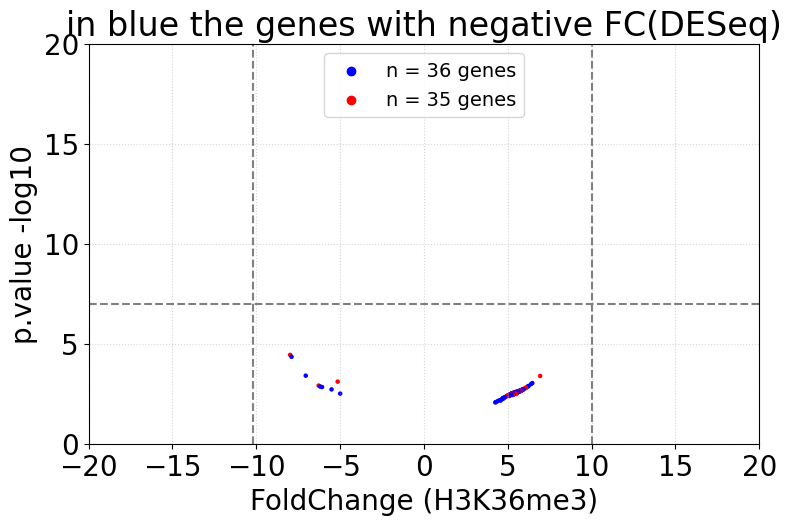

In [45]:
#volcano plot colors based on HEK293 GEx
plt.scatter(x=df_H3K36me3_andDEG_po_neg['Fold'],
            y=df_H3K36me3_andDEG_po_neg['p.value'].apply(lambda x:-numpy.log10(x)),
            s=5, c=colors)

plt.scatter(x=[],y=[], marker="o", color='b', label= f'n = {blue_genes_n} genes')
plt.scatter(x=[],y=[], marker="o", color='r', label= f'n = {red_genes_n} genes')

plt.tight_layout()
plt.legend(fontsize='14')
plt.title('in blue the genes with negative FC(DESeq)')
plt.ylim(0, 20)
plt.xlim(-20, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

print(f'{len(blue_indices)} points for {red_genes_n} genes with negative FC(DESeq) and {len(red_indices)} points for {blue_genes_n} genes with a positive one')


title_file = 'volcano_hNPC_H3K36me3_and_HEK293_DEG_pos_negDEG'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [46]:
 df_H3K36me3_andDEG_po_neg[['SYMBOL', 'annotation',
                                                       'Fold', 'p.value', 
                                                       'log2_FC (GEx)', 'padj(GEx)']]

,SYMBOL,annotation,Fold,p.value,log2_FC (GEx),padj(GEx)
0,CUTC,3' UTR,-7.980953,0.000036,0.722293,0.014745
1,CEP83,"Intron (ENST00000397809.10/51134, intron 7 of 16)",-7.893210,0.000045,-1.108050,0.025614
2,SLMAP,"Intron (ENST00000295951.7/7871, intron 6 of 21)",-7.047436,0.000397,-0.821961,0.049772
3,WDR73,Promoter (<=1kb),6.931082,0.000411,0.683516,0.027242
4,BRAF,Promoter (1-2kb),-5.143708,0.000786,0.711966,0.018654
...,...,...,...,...,...,...
153,TCF12,"Intron (ENST00000438423.6/6938, intron 5 of 20)",4.524325,0.006646,-0.846139,0.001661
154,GLS,Promoter (<=1kb),4.580479,0.006933,-1.055784,0.041643
155,P4HA1,Promoter (1-2kb),4.410246,0.007306,-0.789520,0.022129
156,ATXN2,"Intron (ENST00000642389.2/6311, intron 1 of 26)",4.302476,0.008266,-0.817830,0.043932


In [47]:
# Check up to see if its true (we see, red_3blues_red_4blues_red)
how_much_low = df_H3K36me3_andDEG_po_neg[ (df_H3K36me3_andDEG_po_neg['Fold'] < 1) ]
print(f'only {len(how_much_low)} genes have decresed H3K36me3')
df_H3K36me3_andDEG_po_neg = df_H3K36me3_andDEG_po_neg[['SYMBOL', 'annotation', 
                                                       'Fold', 'p.value', 
                                                       'log2_FC (GEx)', 'padj(GEx)']]
df_H3K36me3_andDEG_po_neg.sort_values('Fold')
df_H3K36me3_andDEG_po_neg.to_csv(file_directory+'1) input/from_output/df_signif_H3K36me3_andDEG.csv', 
                                 index=False, sep=',')

only 9 genes have decresed H3K36me3


# Classification by annotation

In [48]:
df_H3K36me3_andDEG.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'width.1', 'strand.1',
       'Conc', 'Conc_32', 'Conc_37', 'Fold', 'p.value', 'FDR', 'annotation',
       'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME'],
      dtype='object')

In [49]:
#to see the different kind of annotation 
# set(df_H3K36me3_andDEG.annotation)

In [50]:
# create a function to simplufy the annotation
def get_annotation_category(annotation):
    if annotation.startswith('Intron'):
        return 'Intron'
    elif annotation.startswith('Exon'):
        return 'Exon'
    elif annotation.startswith('Promoter'):
        return 'Promoter'
    else:
        return annotation

## All genes

In [51]:
df_H3K36me3 = df_H3K36me3.assign(Annotation = df_H3K36me3['annotation'].apply(get_annotation_category))
df_H3K36me3 = df_H3K36me3[['SYMBOL', 'Fold', 'p.value', 'FDR', 'Annotation']]
print(set(df_H3K36me3.Annotation), '\n')

df_H3K36me3['Annotation'] = df_H3K36me3['Annotation'].str.strip()
df_H3K36me3

{'Promoter', 'Intron', 'Downstream (<=300bp)', "3' UTR", 'Distal Intergenic', "5' UTR", 'Exon'} 



,SYMBOL,Fold,p.value,FDR,Annotation
0,CREBL2,-20.405148,1.764480e-20,1.738648e-15,Promoter
1,PCCA,-19.528880,2.116609e-18,1.042811e-13,Intron
2,ZNF83,-19.227747,1.512751e-16,4.968680e-12,Intron
3,EMBP1,-18.824480,9.374397e-16,2.245645e-11,Distal Intergenic
4,NRP1,-18.894174,1.186074e-15,2.245645e-11,5' UTR
...,...,...,...,...,...
17789,EYA1,4.209499,9.027092e-03,4.996032e-02,Intron
17790,IFFO2,4.218131,9.029145e-03,4.996326e-02,Distal Intergenic
17791,LOC728739,4.218131,9.029145e-03,4.996326e-02,Distal Intergenic
17792,LSAMP,4.218131,9.029145e-03,4.996326e-02,Intron


In [52]:
df_H3K36me3.Annotation.value_counts()

Annotation
Intron                  8536
Promoter                5233
Distal Intergenic       1789
Exon                    1081
3' UTR                  1068
5' UTR                    72
Downstream (<=300bp)      15
Name: count, dtype: int64

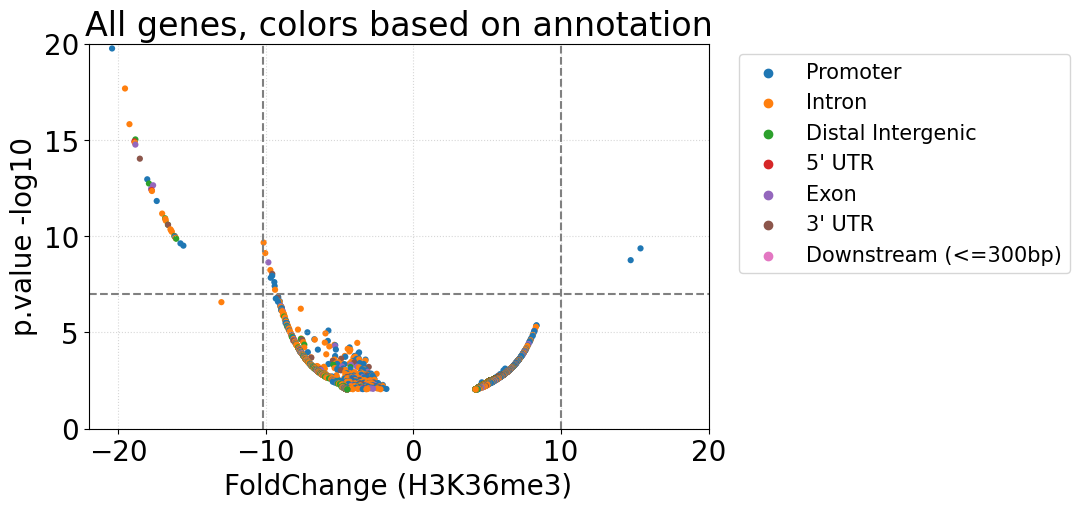

In [53]:
seaborn.scatterplot(data=df_H3K36me3, x=df_H3K36me3['Fold'], 
                    y=df_H3K36me3['p.value'].apply(lambda x:-numpy.log10(x)), 
                    s=20, edgecolor='none', hue="Annotation")

plt.legend(loc='upper right', bbox_to_anchor=(1.60, 1), fontsize='15')

plt.title('All genes, colors based on annotation')
plt.ylim(0, 20)
plt.xlim(-22, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_hNPC_H3K36me3_and_HEK293_all_annotation'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [54]:
# Check up to see if its true (yes, the colors fit to the annotation)
df_ctl = df_H3K36me3[ (df_H3K36me3['Fold'] < 1) ]
df_ctl.sort_values('Fold')

,SYMBOL,Fold,p.value,FDR,Annotation
0,CREBL2,-20.405148,1.764480e-20,1.738648e-15,Promoter
1,PCCA,-19.528880,2.116609e-18,1.042811e-13,Intron
2,ZNF83,-19.227747,1.512751e-16,4.968680e-12,Intron
4,NRP1,-18.894174,1.186074e-15,2.245645e-11,5' UTR
5,LINC01927,-18.870846,1.367406e-15,2.245645e-11,Intron
...,...,...,...,...,...
16270,STAT1,-2.102012,5.771308e-03,3.493495e-02,Intron
15895,KPNB1,-2.065600,5.316754e-03,3.294709e-02,Promoter
16624,SNORD94,-2.059913,6.315468e-03,3.741325e-02,Intron
17268,PCBP2,-2.051993,7.704129e-03,4.393137e-02,Promoter


## Only the DEG genes

In [55]:
df_H3K36me3_andDEG = df_H3K36me3_andDEG.assign(Annotation = df_H3K36me3_andDEG['annotation'].apply(get_annotation_category))
df_H3K36me3_andDEG = df_H3K36me3_andDEG[['SYMBOL', 'Fold', 'p.value', 'FDR', 'Annotation']]
print(set(df_H3K36me3_andDEG.Annotation), '\n')

df_H3K36me3_andDEG['Annotation'] = df_H3K36me3_andDEG['Annotation'].str.strip()
df_H3K36me3_andDEG

{'Promoter', 'Intron', 'Downstream (<=300bp)', "3' UTR", 'Distal Intergenic', "5' UTR", 'Exon'} 



,SYMBOL,Fold,p.value,FDR,Annotation
0,CUTC,-7.980953,0.000036,0.023456,3' UTR
1,CEP83,-7.893210,0.000045,0.027154,Intron
2,SLMAP,-7.047436,0.000397,0.027548,Intron
3,WDR73,6.931082,0.000411,0.027548,Promoter
4,BRAF,-5.143708,0.000786,0.027548,Promoter
...,...,...,...,...,...
153,TCF12,4.524325,0.006646,0.038959,Intron
154,GLS,4.580479,0.006933,0.040315,Promoter
155,P4HA1,4.410246,0.007306,0.042029,Promoter
156,ATXN2,4.302476,0.008266,0.046605,Intron


In [56]:
df_H3K36me3_andDEG.Annotation.value_counts()

Annotation
Intron                  78
Promoter                47
3' UTR                  17
Exon                    10
Distal Intergenic        4
5' UTR                   1
Downstream (<=300bp)     1
Name: count, dtype: int64

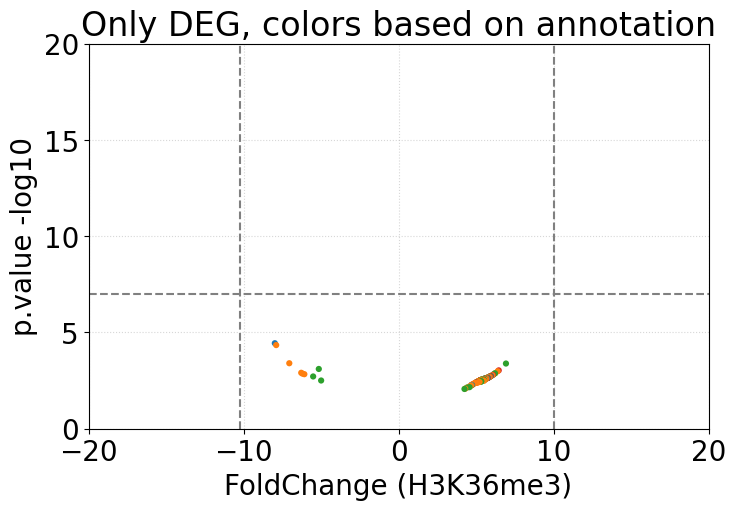

In [57]:
seaborn.scatterplot(data=df_H3K36me3_andDEG, x=df_H3K36me3_andDEG['Fold'], 
                    y=df_H3K36me3_andDEG['p.value'].apply(lambda x:-numpy.log10(x)), 
                    s=20, edgecolor='none', hue="Annotation", legend=False)

plt.title('Only DEG, colors based on annotation')
plt.ylim(0, 20)
plt.xlim(-20, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_hNPC_H3K36me3_and_HEK293_DEG_annotation'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

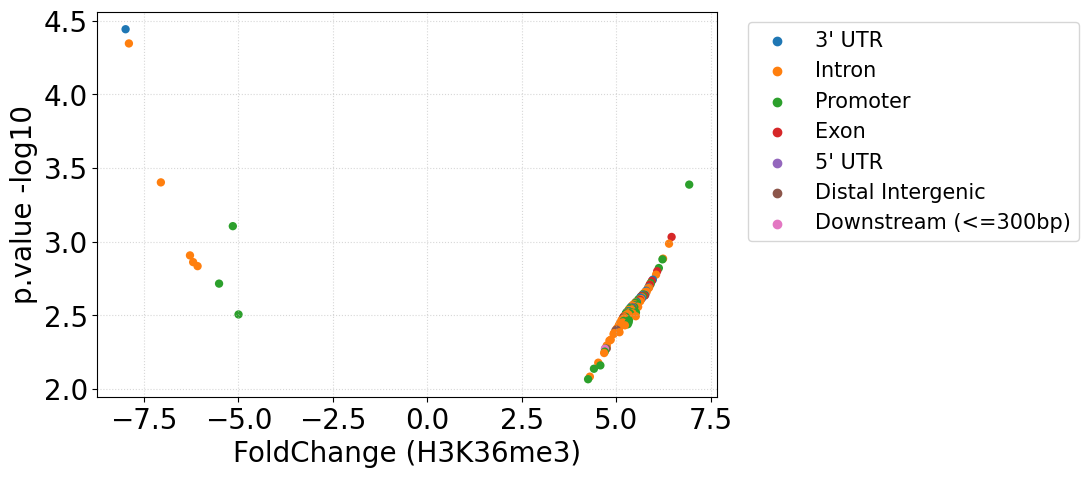

In [58]:
seaborn.scatterplot(data=df_H3K36me3_andDEG, x=df_H3K36me3_andDEG['Fold'], 
                    y=df_H3K36me3_andDEG['p.value'].apply(lambda x:-numpy.log10(x)), 
                    edgecolor='none', hue="Annotation")

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.60, 1), fontsize='15')

plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

title_file = 'volcano_hNPC_H3K36me3_and_HEK293_DEG_annotation_zoom'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [59]:
# Check up to see if its true (yes, the colors fit to the annotation)
df_ctl = df_H3K36me3_andDEG[ (df_H3K36me3_andDEG['Fold'] < 1) ]
df_ctl.sort_values('Fold')

,SYMBOL,Fold,p.value,FDR,Annotation
0,CUTC,-7.980953,0.000036,0.023456,3' UTR
1,CEP83,-7.893210,0.000045,0.027154,Intron
2,SLMAP,-7.047436,0.000397,0.027548,Intron
7,ATR,-6.277242,0.001242,0.027548,Intron
10,SACM1L,-6.193535,0.001380,0.027548,Intron
11,CEP83,-6.076300,0.001469,0.027548,Intron
18,RSRP1,-5.507873,0.001930,0.027548,Promoter
4,BRAF,-5.143708,0.000786,0.027548,Promoter
112,ENC1,-4.992853,0.003126,0.027548,Promoter
